In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [50]:
# Importing dataset
dt = pd.read_csv('Admission_Predict_Dataset.csv')
dt.head()


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [51]:
dt.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


## Analysis of Data

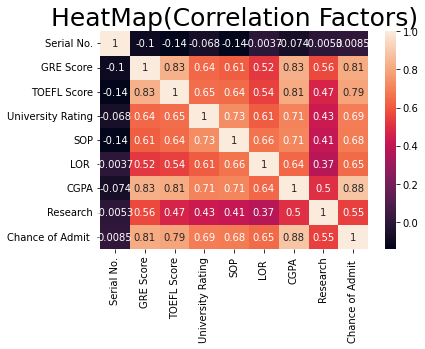

In [52]:
sns.heatmap(dt.corr(), annot=True).set_title('HeatMap(Correlation Factors)', color='black', size='25')
plt.show()

1) GRE Scores


In [53]:
GRE_score = pd.DataFrame(dt['GRE Score'])
GRE_score.describe()

,GRE Score
count,500.000000
mean,316.472000
std,11.295148
min,290.000000
25%,308.000000
50%,317.000000
75%,325.000000
max,340.000000


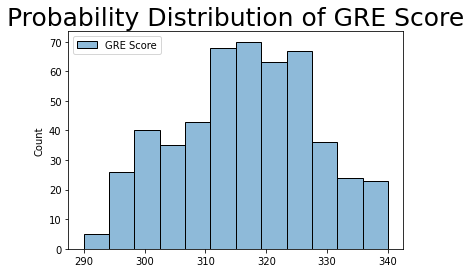

In [54]:
# Probability Distribution of GRE Score

sns.histplot(GRE_score).set_title('Probability Distribution of GRE Score', color='black', size='25')
plt.show()

2) TOEFL scores

In [55]:
TOEFL_Score = pd.DataFrame(dt['TOEFL Score'])
TOEFL_Score.describe()

,TOEFL Score
count,500.000000
mean,107.192000
std,6.081868
min,92.000000
25%,103.000000
50%,107.000000
75%,112.000000
max,120.000000


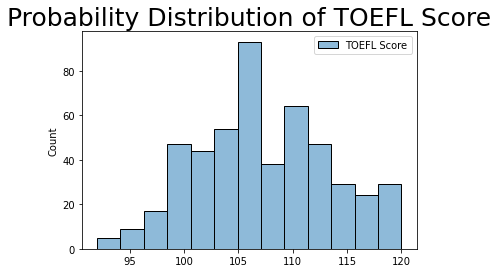

In [56]:
# Probability Distribution of TOEFL Score

sns.histplot(TOEFL_Score).set_title('Probability Distribution of TOEFL Score', color='black', size='25')
plt.show()

3) University Rating

In [57]:
University_Rating = dt.groupby(['University Rating']).count()
University_Rating = University_Rating['GRE Score']
University_Rating = pd.DataFrame(University_Rating)
University_Rating.rename({'GRE Score': 'No of institutes'}, inplace=True, axis=1)
University_Rating

,No of institutes
University Rating,
1,34
2,126
3,162
4,105
5,73


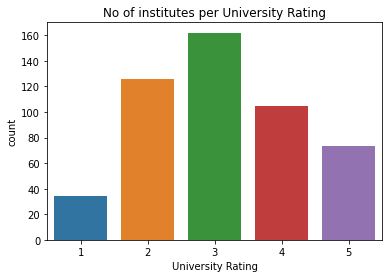

In [58]:
sns.countplot(x='University Rating', data=dt).set_title('No of institutes per University Rating')
plt.show()

4) SOP

In [59]:
SOP_score = dt.groupby(['SOP']).count()['GRE Score']
SOP_score = pd.DataFrame(SOP_score)
SOP_score

,GRE Score
SOP,
1.0,6
1.5,25
2.0,43
2.5,64
3.0,80
3.5,88
4.0,89
4.5,63
5.0,42


5) LOR


In [60]:
# LOR_score = dt.groupby(['LOR']).count()['GRE Score']
# LOR_score = pd.DataFrame(LOR_score)
# LOR_score.rename({'GRE Score':'Count'}, axis=1, inplace=True)
# LOR_score

6. Research

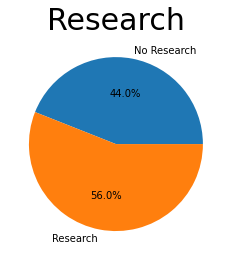

In [61]:
RES_Count = dt.groupby(['Research']).count()
RES_Count = RES_Count['GRE Score']
RES_Count = pd.DataFrame(RES_Count)
RES_Count.rename({'GRE Score': 'Count'}, axis=1, inplace=True)
RES_Count.rename({0: 'No Research', 1:'Research'}, axis=0, inplace=True)
plt.pie(x=RES_Count['Count'], labels=RES_Count.index, autopct='%1.1f%%')
plt.title('Research', pad=5, size=30)
plt.show()

7. CGPA

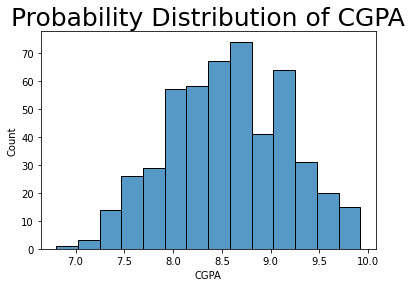

In [62]:
sns.histplot(dt['CGPA']).set_title('Probability Distribution of CGPA', color='black', size='25')
plt.show()

8. Chance of Admit

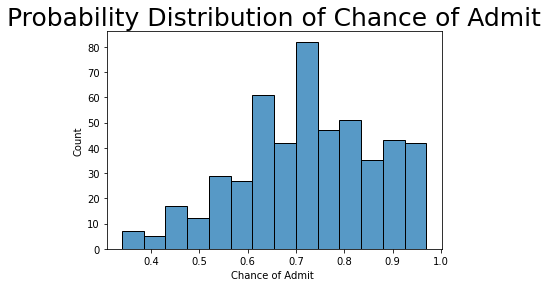

In [63]:
sns.histplot(dt['Chance of Admit ']).set_title('Probability Distribution of Chance of Admit', color='black', size='25')
plt.show()

In [64]:
X = dt.drop(['Chance of Admit '], axis=1)
y = dt['Chance of Admit ']
X.shape, y.shape

((500, 8), (500,))

In [65]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X[['GRE Score', 'CGPA', 'TOEFL Score']] = scaler.fit_transform(X[['GRE Score', 'CGPA', 'TOEFL Score']])

In [66]:
X.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1,1.819238,1.778865,4,4.5,4.5,1.776806,1
1,2,0.667148,-0.031601,4,4.0,4.5,0.485859,1
2,3,-0.041830,-0.525364,3,3.0,3.5,-0.954043,1
3,4,0.489904,0.462163,3,3.5,2.5,0.154847,1
4,5,-0.219074,-0.689952,2,2.0,3.0,-0.606480,0


In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((400, 8), (100, 8), (400,), (100,))

In [68]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [69]:
lr.fit(X_train, y_train)

LinearRegression()

In [70]:
y_pred = lr.predict(X_test)
y_pred = y_pred.round(2)

In [71]:
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

,Actual,Predicted
90,0.64,0.65
254,0.85,0.84
283,0.80,0.78
445,0.91,0.90
461,0.68,0.62
...,...,...
372,0.95,0.96
56,0.64,0.53
440,0.53,0.56
60,0.48,0.58


In [73]:
y_test = np.array(y_test)
# y_test = y_test.to_numpy()
y_test

array([0.64, 0.85, 0.8 , 0.91, 0.68, 0.54, 0.54, 0.65, 0.52, 0.79, 0.65,
       0.74, 0.64, 0.79, 0.89, 0.43, 0.81, 0.73, 0.8 , 0.58, 0.57, 0.74,
       0.6 , 0.93, 0.88, 0.67, 0.7 , 0.57, 0.48, 0.64, 0.69, 0.47, 0.57,
       0.87, 0.39, 0.53, 0.84, 0.89, 0.63, 0.7 , 0.72, 0.86, 0.91, 0.75,
       0.74, 0.76, 0.96, 0.81, 0.6 , 0.62, 0.69, 0.68, 0.59, 0.8 , 0.71,
       0.78, 0.69, 0.89, 0.67, 0.58, 0.44, 0.89, 0.53, 0.92, 0.66, 0.73,
       0.52, 0.86, 0.54, 0.72, 0.92, 0.55, 0.75, 0.73, 0.85, 0.91, 0.75,
       0.71, 0.54, 0.68, 0.62, 0.88, 0.59, 0.74, 0.8 , 0.63, 0.77, 0.65,
       0.57, 0.7 , 0.76, 0.78, 0.71, 0.73, 0.73, 0.95, 0.64, 0.53, 0.48,
       0.64])

In [74]:
y_pred

array([0.65, 0.84, 0.78, 0.9 , 0.62, 0.63, 0.53, 0.72, 0.52, 0.74, 0.61,
       0.71, 0.63, 0.76, 0.88, 0.51, 0.84, 0.65, 0.76, 0.51, 0.51, 0.73,
       0.52, 0.91, 0.82, 0.74, 0.68, 0.51, 0.57, 0.59, 0.74, 0.47, 0.64,
       0.83, 0.58, 0.61, 0.85, 0.89, 0.6 , 0.65, 0.67, 0.88, 0.88, 0.72,
       0.76, 0.78, 0.97, 0.86, 0.66, 0.65, 0.64, 0.63, 0.62, 0.79, 0.68,
       0.83, 0.53, 0.86, 0.6 , 0.65, 0.48, 0.91, 0.63, 0.96, 0.72, 0.61,
       0.71, 0.87, 0.52, 0.76, 0.89, 0.77, 0.71, 0.66, 0.79, 0.93, 0.76,
       0.72, 0.58, 0.66, 0.6 , 0.86, 0.58, 0.67, 0.78, 0.56, 0.83, 0.61,
       0.47, 0.65, 0.72, 0.8 , 0.67, 0.7 , 0.62, 0.96, 0.53, 0.56, 0.58,
       0.61])

In [75]:
TE = 0
for j in range(len(y_test)):
    TE += (y_test[j] - y_pred[j])**2
    
TE

0.3918000000000001

In [76]:
# from sklearn.metrics import f1_score
# from sklearn.metrics import accuracy_score



# # score = f1_score(y_test, y_pred, average='micro', labels=None)
# #
# score = accuracy_score(y_test, y_pred)